In [7]:
from google.colab import files


uploaded = files.upload()

Saving agricultural_yield.csv to agricultural_yield.csv


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
data =pd.read_csv('agricultural_yield.csv')
data.head()
df=data

In [9]:
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']].values
y = df['Yield_kg_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
model= Sequential([
Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [13]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 534173.5625 - mae: 704.0845 - val_loss: 554689.0625 - val_mae: 718.2061
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 525092.7500 - mae: 697.7676 - val_loss: 497123.6875 - val_mae: 678.8524
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 446886.9062 - mae: 640.8208 - val_loss: 361283.6562 - val_mae: 577.6403
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 303747.1250 - mae: 526.7621 - val_loss: 177873.3125 - val_mae: 403.9398
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 130365.3906 - mae: 341.4225 - val_loss: 48379.5859 - val_mae: 201.7746
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34293.1406 - mae: 163.8873 - val_loss: 13601.3096 - val_mae: 95.9207
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13131.8311 - mae: 92.1415 - val_loss: 9810.4199 - val_mae: 78.8920
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10274.7676 - mae: 81.0682 - val_l

In [15]:
test_loss,test_mae=model.evaluate(X_test, y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2692.0178 - mae: 42.5897 
Test Mean Absolute Error: 40.56


In [17]:
import matplotlib.pyplot as plt

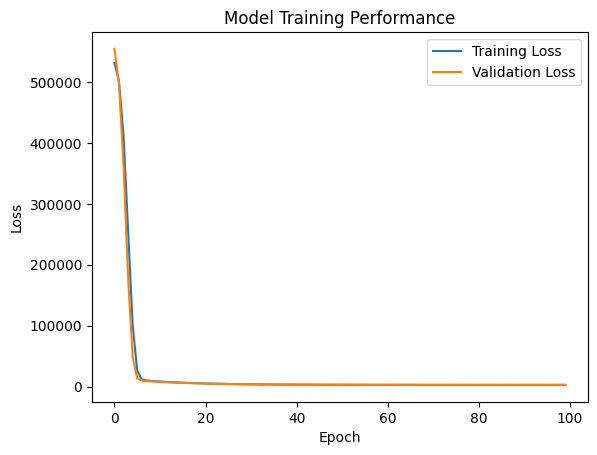

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [22]:
Y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-23-f4d7dc1fb5d3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-23-f4d7dc1fb5d3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred, label='Predicted Yield')


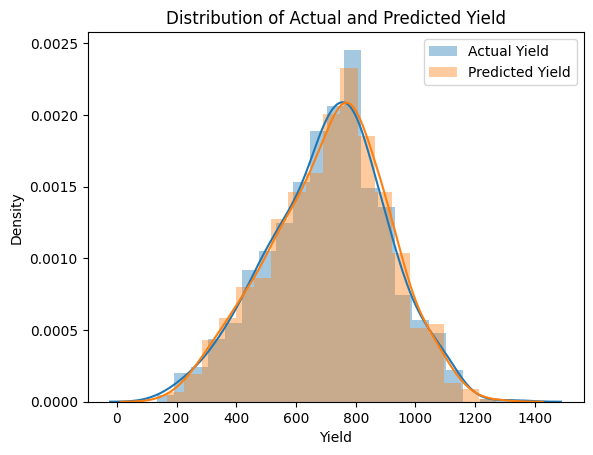

In [23]:
# Distribution plots
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(Y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()


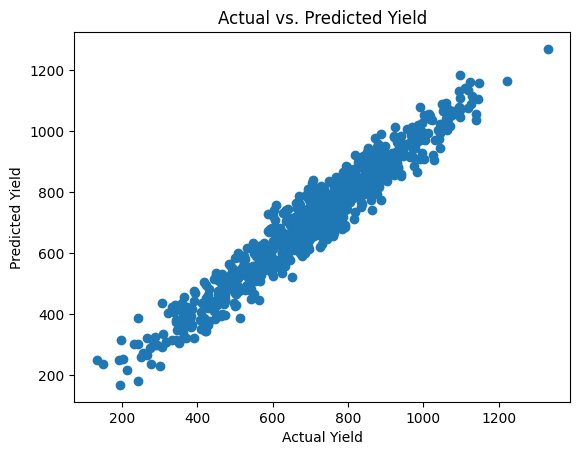

In [24]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()